In [12]:
from collections import deque
import numpy as np
import pandas as pd
import csv
from pulp import *
from pulp import GLPK
import math

In [13]:
Data = pd.read_csv('exemple.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
Data.info
Data.dropna()

,Brigade,Terminal,Compagnie,N parking,N vol,Immat,Heure accostage,heure desaccostage
Date,,,,,,,,
2020-02-23,Journee,T1,AH,W09,6040,JK,8:15,9:10
2020-02-23,Journee,T1,DTH,W12,1903,CB,8:45,10:10
2020-02-23,Journee,T1,DTH,W08,1803,CA,9:55,11:20
2020-02-23,Journee,T1,DTH,W10A,2111,CF,10:05,11:05
2020-02-23,Journee,T1,DTH,W10A,2220,CF,13:50,14:55
2020-02-23,Journee,T1,DTH,W12,2110,CC,14:25,15:15
2020-02-23,Journee,T1,DTH,W10C,1321,CB,14:45,18:10
2020-02-23,Journee,T1,AH,W11A,6006,JU,17:10,18:20
2020-02-23,Journee,T1,AH,W09,6026,KB,17:20,18:25


In [ ]:
# def dsatur(g):
#     n = np.shape(g)[0]
#     couleur = n*[0]
    
#     #liste des sommets par ordre de degrés décroissants
#     sommets_ord = tri_degre(Adj,True)
    
       
#     #tant qu'il y a des sommets sans couleur    
#     while 0 in couleur:
   
#         #recherche du sommet à colorer, de degré de saturation maximum
#         dsat = n*[0]
#         degre_sat_max = 0
#         sommetchoisi = sommets_ord[0]
        
#         for i in sommets_ord:
            
#             #si le sommet i est sans couleur
#             if couleur[i]==0:

#                 vois = voisins(g,i)
               
#                 #calcul du degré de saturation du sommet i
#                 couleurvois = []
#                 for k in vois:
#                     if couleur[k]>0:
#                         couleurvois = couleurvois+[couleur[k]]
#                 dsat[i] = len(np.unique(couleurvois))
                
#                 #le sommet i est-il de degre de saturation maximum ?
#                 if dsat[i]>degre_sat_max :
#                     degre_sat_max = dsat[i]
#                     sommetchoisi = i
        
#         #couleur des voisins du sommet choisi
#         vois_sommetchoisi = voisins(g,sommetchoisi)
#         couleurvois_sommetchoisi = []    
#         for k in vois_sommetchoisi:
#             couleurvois_sommetchoisi = couleurvois_sommetchoisi+[couleur[k]]        
        
#         #choix de la plus petite couleur non présente chez les voisins du sommet choisi
#         j=1
#         while j in couleurvois_sommetchoisi:
#             j=j+1
            
#         #coloration du sommet choisi avec la couleur trouvée ci-dessus
#         couleur[sommetchoisi]=j

#     return couleur

In [14]:
import time
import datetime as dt
from datetime import datetime, timedelta
import time
TimeGap=10
def Trans_to_min(x):
    D=x.day*24*60
    min = x.minute
    H = x.hour *60
    return D+min+H
time= Data["Heure accostage"]
time.dropna()
print(time)
Graph_intervale=[]
for i in [x for x in range(len(time)) if x != None]:
    # print(time[i])
    # if time[i]== None :
    #     time[i].pop()
    # else:
    try:
        Graph_intervale.append([])
        time[i] = dt.datetime.strptime(str(time[i]), '%Y-%d-%m %H:%M:%S')
        min= time[i]- dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(min))
        max= time[i]+ dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(max))
    except:
        time[i] = dt.datetime.strptime(str(time[i]), '%H:%M')
        min= time[i]- dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(min))
        max= time[i]+ dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(max)) 
print((Graph_intervale))

# for i in range(len(time)):
#     try:
        
#         time[i] = dt.datetime.strptime(str(time[i]), '%Y-%d-%m %H:%M:%S')
        
#         #print(time[i])
#     except:
#         pass

# time.dropna()
# print(time)
# Graph_intervale=[]
# def create_graph_inter(time):
#     Graph_intervale=[]
#     for i in range(len(time)):
#         Graph_intervale.append([])
#         Graph_intervale[i].append(time[i]+pd.DateOffset(minutes=n))
#         Graph_intervale[i].append(dt.datetime(time[i]) + dt.timedelta(minutes=5))
        
#     return  Graph_intervale
# Graph_intervale=create_graph_inter(time)
# print(Graph_intervale)
# # print(time)



Date
2020-02-23     8:15
2020-02-23     8:45
2020-02-23     9:55
2020-02-23    10:05
2020-02-23    13:50
2020-02-23    14:25
2020-02-23    14:45
2020-02-23    17:10
2020-02-23    17:20
2020-02-23    17:55
2020-02-23     8:05
2020-02-23     8:16
2020-02-23     8:40
2020-02-23     9:25
2020-02-23    11:10
2020-02-23    12:10
2020-02-23    12:36
2020-02-23    13:55
2020-02-23    17:40
2020-02-23     8:05
2020-02-23     8:20
2020-02-23     8:05
2020-02-23     8:10
2020-02-23     8:20
2020-02-23     8:20
2020-02-23     8:30
2020-02-23     8:55
2020-02-23     9:15
2020-02-23     9:33
2020-02-23     9:53
2020-02-23    10:20
2020-02-23    10:30
2020-02-23    10:40
2020-02-23    11:20
2020-02-23    11:40
2020-02-23    13:13
2020-02-23    13:57
2020-02-23    13:55
2020-02-23    14:15
2020-02-23    14:55
2020-02-23    15:05
2020-02-23    15:35
2020-02-23    15:48
2020-02-23    16:10
2020-02-23    16:30
2020-02-23    14:30
2020-02-23    18:09
2020-02-23    17:59
2020-02-23    18:02
2020-02-23    1

C:\Users\pc\AppData\Local\Temp/ipykernel_30560/1396459953.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time[i] = dt.datetime.strptime(str(time[i]), '%H:%M')


In [15]:
M=Graph_intervale
def Verify_in_interval(M1,M2):
    if M1[0]<=M2[0] and M1[1]>=M2[0]:
        return True
    elif M1[0]<=M2[1] and M1[1]>=M2[1]:
        return True
    else: 
        return False 
def   listAdj(M):
    listAdj=[]
    for i in range(len(M)):
        listAdj.append([])
        for j in [x for x in range(len(M)) if x != i]:
            if Verify_in_interval(M[i],M[j]) or Verify_in_interval(M[j],M[i]) :
                listAdj[i].append(j)
            else:
                pass
    return listAdj
            #print(listAdj[i])
    #print(listAdj[i])
# print(M)
listAdj=listAdj(M)
print(listAdj)

[[10, 11, 19, 20, 21, 22, 23, 24], [12, 26], [3, 29], [2], [17, 36, 37], [38, 45], [39], [8], [7], [47, 48], [0, 19, 21, 22], [0, 20, 22, 23, 24], [1, 25], [27, 28], [33], [], [], [4, 36, 37], [], [0, 10, 21, 22], [0, 11, 22, 23, 24, 25], [0, 10, 19, 22], [0, 10, 11, 19, 20, 21, 23, 24], [0, 11, 20, 22, 24, 25], [0, 11, 20, 22, 23, 25], [12, 20, 23, 24], [1], [13], [13], [2], [31], [30, 32], [31], [14], [], [], [4, 17, 37], [4, 17, 36], [5], [6, 40], [39], [], [], [], [], [5], [47, 48, 49], [9, 46, 48, 49], [9, 46, 47, 49], [46, 47, 48], []]


In [ ]:
# def WP(LA):
#     n=len(LA)
#     # CONSTRUCTION DE LA MATRICE D'ADJACENCE
#     M = matriceAdj(LA)
    
#     # INITIALISATION DE LA LISTE DES DEGRES
#     D = []
#     # CONSTRUCTION DE LA LISTE DES DEGRES
#     for i in range(n):
#         d = 0
#         # On balaie chaque ligne de la matrice d'adjacence
#         for j in range(n):
#             # Si un coefficient de la ligne est non nul, on incrÃ©mente d
#             if M[i,j] != 0:
#                 d += 1
#         D.append([i,d])
    
#     # TRI DE LA LISTE DES DEGRES (DANS L'ORDRE DECROISSANT)
#     D.sort(key=lambda degre: degre[1])
#     D.reverse()
    
#     # COLORATION
#     # Initialisation de l'indice des couleurs
#     C = 0
#     # Initialisation du nombre de sommets coloriÃ©s
#     ColoredVertices = 0
#     # Boucle principale : on balaie D tant qu'il reste au moins un sommet Ã ...
#     # colorier !
#     while ColoredVertices < len(D):
#         for i in range(len(D)):
#             # On ne s'interesse qu'aux sommets non encore colories
#             if len(D[i]) == 2:
#                 # Le sommet est potentiellement coloriable dans la couleur
#                 # courante
#                 ColPoss = True
#                 # Pour tous les sommets prÃ©cÃ©dant le sommet courant dans la
#                 # liste D...
#                 for j in range(i):
#                     # Si le sommet d'indice j<i dans D est deja  colorie avec la
#                     # couleur C et adjacent au sommet d'indice i dans D alors
#                     # le sommet d'indice i dans D ne peut etre colorie avec C et
#                     # on va passer au sommet suivant dans D sans rien faire.
#                     if len(D[j]) == 3 and D[j][2] == C and M[D[i][0],D[j][0]] == 1:
#                         ColPoss = False
#                         break
#                 # Si on est dans une situation favorable, on colorie le sommet
#                 # d'indice i dans D avec la couleur courante.
#                 if ColPoss:
#                     D[i].append(C)
#                     ColoredVertices += 1
#         # La liste D a ete balayee, on passe a  la couleur suivante...
#         C +=1
#     # Affichage des rzsultats
#     print("Nombre de couleurs utilsÃ©es :",C)
#     print("Sommets ayant la mÃªme couleur :")
#     for i in range(C):
#         s = "couleur " + str(i) + " : "
#         for e in D:
#             if e[2] == i:
#                 s += str(e[0]) + " "
#         print(s)


In [ ]:


### Affichage de graphes, avec GraphViz

import numpy as np
from graphviz import Digraph, Graph
import matplotlib
import matplotlib.cm
# Fonction d'affichage d'un graphe a  partir d'une matrice d'adjacence
# M : matrice d'adjacence avec ou sans les poids (matrice numpy)
# directed : bool indiquant si le graphe est oriente ou non
# weighted : bool indiquant si les arcs du graphe sont pondere ou non
# label : si None les labels seront 0, 1, 2,..., n-1
# color : vecteur d'entiers contenant le numero associe a  la couleur
# title : nom du graphe
# view : bool qui determine l'ouverture d'une fenÃªtre de visualisation de l'image
# dispo : disposition des sommets. 
def display(M, directed = True, weighted = False, label = None, color = None, title = "G", view = False, dispo="neato"):
    # Nombre de sommets
    n = M.shape[0]
    # Labels des sommets
    if label == None:
        label = [str(i) for i in range(0, n)]
    # Couleur des sommets
    if color==None:
        lcol = [(1.,1.,1.,1.)]*n
    else:
        cm = matplotlib.cm.get_cmap('gist_rainbow')
        nbcol = max(color)
        lcol = [cm(1.*x/nbcol) if x!=0 else (1.,1.,1.,1.) for x in color]
    # Initialisation du graphe
    if directed == True:
        t = Digraph(title, engine = dispo, format = 'svg')
    else:
        t = Graph(title, engine = dispo, format = 'svg')
    # Attibuts graphiques
    t.attr('graph', overlap = 'false', fontsize = '16', label = title, bgcolor = "#ffffff00",fontcolor="grey")
    t.attr('node', shape = 'circle', fixedsize = 'true', width = '0.4', fontsize = '14', style = "filled", color = 'grey')
    t.attr('edge', arrowsize = '0.7', fontsize = '12',color="grey",fontcolor="grey")
    # Ajout des sommets
    for i in range(0,M.shape[0]):
        #t.attr('node', fillcolor = "%f, %f, %f, %f" % lcol[i])
        t.attr('node', fillcolor = matplotlib.colors.to_hex(lcol[i], keep_alpha=False))
        t.node(str(label[i]))
    # Ajout des arcs (depend du type de matrice fournie : adjacence ou matrice de poids alacoutant)
    if weighted == False:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]>0:
                    t.edge(str(label[i]),str(label[j]))
    else:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]<float("inf"):
                    t.edge(str(label[i]),str(label[j]),label = str(M[i,j]))
    # Affichage
    if(view):
        t.view()
    else:
        t.render('output/'+title+'.gv', view=view)
    # Retour
    return(t)



In [ ]:
# def   listAdj(M):
#     listAdj=[]
#     for i in range(len(M)):
#         listAdj.append([])
#         for j in [x for x in range(len(M)) if x != i]:
#             if (int(M[i][0])<=int(M[j][0]) and int(M[i][1])>=int(M[j][0])) or (int(M[i][0])<=int(M[j][1]) and int(M[i][1])>=int(M[j][1])) or (int(M[j][0])<=int(M[i][0]) and int(M[j][1])>=int(M[j][0])) :
#                 listAdj[i].append(j)
#     return listAdj

In [17]:
def matriceAdj(Adj):
    Mat=[]
    for i in range( len(Adj)):
        Mat.append([])
        for j in range( len(Adj)):
            Mat[i].append(0)
            for k in range(len(Adj[i])):
                if j==Adj[i][k]:
                    Mat[i][j]=1
    return Mat



In [18]:
def arret(M):
    ex=[[],[]]
    for i in range (len(M)-1):
        for j in range(i+1,len(M)):
            if M[i][j]==1:
                ex[0].append(i)
                ex[1].append(j)
    return ex


In [19]:
def tri_degre(M1,Bool):
    tri=[]
    sortemat = sorted(M1, key=len,reverse=Bool)
    for i in range(len(sortemat)):
        for j in range(len(sortemat)):
            if sortemat[i]==M1[j]:
                tri.append(j)
                break
    tri=np.array(tri)
    return tri

In [20]:
file = open("essie.csv", "r")
csv_reader = csv.reader(file)

lists_from_csv = []
for row in csv_reader:
    lists_from_csv.append(row)


print(lists_from_csv)

[['3368056', '3472222'], ['3576389', '3680556'], ['4062500', '4166667'], ['4131944', '4236111'], ['5694444', '5798611'], ['5937500', '6041667'], ['6076389', '6180556'], ['7083333', '7187500'], ['7152778', '7256944'], ['7395833', '7500000'], ['8194444', '8298611'], ['8680556', '8784722'], ['9201389', '9305556'], ['2430556', '2534722'], ['2465278', '2569444'], ['2916667', '3020833'], ['3298611', '3402778'], ['3375000', '3479167'], ['3541667', '3645833'], ['3854167', '3958333'], ['4583333', '4687500'], ['5000000', '5104167'], ['5180556', '5284722'], ['5729167', '5833333'], ['7291667', '7395833'], ['8097222', '8201389'], ['8541667', '8645833'], ['9444444', '9548611'], ['9652778', '9756944'], ['13889', '118056']]


In [ ]:
Adj = np.array(lists_from_csv)
Adj=listAdj(Adj)
print(Adj)

[[13, 14, 15, 16, 17, 29], [0, 13, 14, 15, 16, 17, 18, 29], [0, 1, 3, 13, 14, 15, 16, 17, 18, 19, 29], [0, 1, 2, 13, 14, 15, 16, 17, 18, 19, 29], [0, 1, 2, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 5, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29], [14, 29], [13, 29], [13, 14, 29], [0, 13, 14, 15, 17, 29], [0, 13, 14, 15, 16, 29], [0, 1, 13, 14, 15, 16, 17, 29], [0, 1, 13, 14, 15, 16, 17, 18,

In [23]:
Mat=matriceAdj(listAdj)
Adj=listAdj

print (Mat)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
Ex=arret(Mat)
print("ex1= ",Ex[0])
print("ex2= ",Ex[1])

ex1=  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 4, 5, 5, 6, 7, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 13, 13, 14, 17, 17, 19, 19, 20, 20, 20, 20, 21, 22, 22, 23, 23, 24, 30, 31, 36, 39, 46, 46, 46, 47, 47, 48]
ex2=  [10, 11, 19, 20, 21, 22, 23, 24, 12, 26, 3, 29, 17, 36, 37, 38, 45, 39, 8, 47, 48, 19, 21, 22, 20, 22, 23, 24, 25, 27, 28, 33, 36, 37, 21, 22, 22, 23, 24, 25, 22, 23, 24, 24, 25, 25, 31, 32, 37, 40, 47, 48, 49, 48, 49, 49]


In [25]:
Mat= np.array(Mat)

In [29]:

def Gloton(Adj):
    n=len(Adj)
    NC=dict()
    C=[0 for k in range(n)]
    for i in range(n):
        NC[i]=[]
    def  rajouter(k,NC):
        if ((k in NC)==True):
            return NC
        else:
            NC.append(k)
            return NC
    i=0
    while i<=n-1:
        exist=True
        k=0
        while (exist==True):
            exist=k in NC[i]
            if (exist==True):
                k+=1
        C[i]=k    
        for j in range(len(Adj[i])):
            voisin=Adj[i][j]
            NC[voisin]=rajouter(k,NC[voisin])
        i+=1
    return C


# %%
# C=Gloton(Adj)
# print(C)
# def freq(C):
#     fc=[]
#     i=0

#     while (i in C):
#         k=0
#         for j in C:
#             if j==i:
#                 k+=1
#         fc.append(k)
#         i+=1
#     return fc
# def nequitable(fc):
#     for i in fc:
#         if not i+1>=max(fc):
#             return True
#     return False
# def maxid(C,fc):
#     M=[]
#     maxid=[]
#     for i in range(len(fc)):
#         if fc[i]==max(fc):
#             M=i
#             break
#     for i in range(len(C)):
#         if C[i]==M:
#             maxid.append(i)
#     return maxid
# def minid(C,fc):
#     M=[]
#     minid=[]
#     for i in range(len(fc)):
#         if fc[i]==min(fc):
#             M=i
#             break
#     for i in range(len(C)):
#         if C[i]==M:
#             minid.append(i)
#     return minid


# fc=freq(C)
# while(nequitable(fc)):
#     maxlist=maxid(C,fc)
#     minlist=minid(C,fc)
#     for i in maxlist:
#         for j in minlist:
#             if not ( i in Adj[j] and j in Adj[i]):
#                 C[i]=C[j]
#                 break;
#     if fc==freq(C):
#         C[maxlist[0]]=max(C)+1
#     fc=freq(C)
#     break
# print(C)
            





# %%
Adj
C=Gloton(Adj)
listco = []

def co_adj(Adj,C):

    global listco
    for i in range(len(Adj)):
        list=[]
        for j in range (len(Adj[i])):
            x=Adj[i][j]
            list.append(C[x])
        listco.append(list)
    return(listco)
print( "le vecteur des couleurs ajacentes est",co_adj(Adj,C))
couleur=[]
def Couleur(C):
    global couleur
    couleur=[]
    for i in range(len(set(C))):
        couleur.append(i)
    return (couleur)
print("les couleurs utilisées sont",Couleur(C))

# %%
freq=[]
cmax=-1
cmin=-1
def Frequance ():
    global couleur
    global C
    global freq
    global cmax
    global cmin
    freq=[]
    for i in range(len(couleur)):
        x=0
        for j in range(len(C)):
            if C[j]==couleur[i]:
                x+=1
        freq.append(x)
    cmax=freq.index(max(freq))
    cmin=freq.index(min(freq))
    return (freq)
Frequance ()


print("l'ocurance initiale de chaque couleur est",freq)

# %%
nequitable=True
def Equitabilite(freq):
    global nequitable
    c = int(max(freq)) - int(min(freq))
    print(c)
    if c > 1:
        nequitable = False
    else:
        nequitable=True
    return (nequitable)
Equitabilite(freq)
print(nequitable)
if nequitable==False:
    print("Equitable")
else:
    print("n'est pas  equitable")

# %%
vecclr=[]
def sommets_couleur(C,couleur):
    global vecclr
    for i in range(len(couleur)):
        vec=[]

        for j in range(len(C)):
            if couleur[i]==C[j]:

                vec.append(j)
        vecclr.append(vec)
    return (vecclr)

# %%
sommets_couleur(C, couleur)
test=False
while(nequitable==False and test==False):
    x=cmax
    for i in range(len(vecclr[x])):
        if cmin not in listco[(vecclr[x][i])]:
            y=int(vecclr[x][i])
            C[y]=cmin
            test=True
            Couleur(C)
            co_adj(Adj, C)
            Frequance()
            print(freq)
            Equitabilite(freq)
            sommets_couleur(C, couleur)

            break
        else:
            test=False
    if test==False:

        z=int(vecclr[x][0])
        C[z] =len(set(C))
        Couleur(C)
        print(couleur)
        co_adj(Adj, C)
        Frequance()
        Equitabilite(freq)
        sommets_couleur(C, couleur)

# %%
print("le vecteur de coloration obtenue avec l'algorithme de jdk est",C,"le nombrede couleurs utilisees est",len(set(C)),"elles sont les suivantes",set(C))




le vecteur des couleurs ajacentes est [[1, 1, 2, 2, 3, 4, 3, 5], [1, 1], [1, 1], [0], [1, 2, 3], [1, 1], [1], [1], [0], [1, 2], [0, 2, 3, 4], [0, 2, 4, 3, 5], [0, 0], [1, 1], [1], [], [], [0, 2, 3], [], [0, 1, 3, 4], [0, 1, 4, 3, 5, 0], [0, 1, 2, 4], [0, 1, 1, 2, 2, 3, 3, 5], [0, 1, 2, 4, 5, 0], [0, 1, 2, 4, 3, 0], [1, 2, 3, 5], [0], [0], [0], [0], [1], [0, 0], [1], [0], [], [], [0, 1, 3], [0, 1, 2], [0], [0, 0], [1], [], [], [], [], [0], [1, 2, 3], [0, 0, 2, 3], [0, 0, 1, 3], [0, 1, 2], []]
les couleurs utilisées sont [0, 1, 2, 3, 4, 5]


TypeError: 'datetime.datetime' object is not callable

In [30]:
# %%
# Import of the pyomo module
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

# Creation of a Concrete Model
model = ConcreteModel()

# %%
model.C = Set(initialize=range(max(C)+1), doc='les Conducteur')
model.J = Set(initialize=range(len(Adj)), doc='les jobs')
model.A = Set(initialize=range(len(Ex[1])), doc='les arcs')

# %%
model.n = Param(initialize=8, doc='le nombre de jobs')
model.c = Param(initialize=6, doc='le nombre de conducteur')
model.m = Param(initialize=25, doc='les relations entre les arcs')
model.ex1 = Param(model.A,initialize=Ex[0], doc='extrémité 1')
model.ex2 = Param(model.A,initialize=Ex[1], doc='extrémité 2')

# %%
model.x = Var(model.C, model.J,domain=Binary, doc='affectation conducteur')
model.v = Var(model.C,bounds=(0,None),domain=Integers, doc='les taches')
model.y = Var(bounds=(0,None),domain=Integers, doc='valeur de comparaison')

# %%
def Cotraint1(model,j):
  return sum(model.x[i,j] for i in model.C) == 1
model.C1 = Constraint(model.J, rule=Cotraint1, doc='verification daffectation')


def Contraint2(model,i,k):
  return ((model.x[i,model.ex1[k]]+model.x[i,model.ex2[k]])) <= 1  

model.C2 = Constraint (model.C,model.J, rule=Contraint2, doc='verification de non chevauchement ')

def Contraint3(model,i):
  return sum(model.x[i,j] for j in model.J)==model.v[i]

model.C3 = Constraint (model.C, rule=Contraint3, doc='une seul tache par conducteur')

def Contraint4(model,i):
  return (model.v[i]<=model.y)

model.C4 = Constraint (model.C, rule=Contraint4, doc='maximiser')

# %%
def objective_rule(model):
  return model.y
model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')

# %%
def pyomo_postprocess(options=None, instance=None, results=None):
  model.x.display()
# %%


opt = SolverFactory("gurobi")
results = opt.solve(model,tee=True)
#sends results to stdout
results.write()
print("\nDisplaying Solution\n" + '-'*60)
pyomo_postprocess(None, model, results)
# %%




TypeError: 'datetime.datetime' object is not callable

In [ ]:
x=model.x
Group_co=[]
for i in model.C:
    Group_co.append([])
    for j in model.J:
        if x[i,j].value == 1:
            Group_co[i].append(j)

print(Group_co)
for i in range(len(Group_co)):
    print("list des vols du conducteur "+str(i+1))
    for j in Group_co[i]:
        print(lists_from_csv[j])


[[0, 8, 9, 19, 25], [10, 21, 24, 27, 28], [13, 17, 18, 20, 22], [12, 14, 15, 16, 29], [3, 4, 5, 6, 7], [1, 2, 11, 23, 26]]
list des vols du conducteur 1
['3368056', '3472222']
['7152778', '7256944']
['7395833', '7500000']
['3854167', '3958333']
['8097222', '8201389']
list des vols du conducteur 2
['8194444', '8298611']
['5000000', '5104167']
['7291667', '7395833']
['9444444', '9548611']
['9652778', '9756944']
list des vols du conducteur 3
['2430556', '2534722']
['3375000', '3479167']
['3541667', '3645833']
['4583333', '4687500']
['5180556', '5284722']
list des vols du conducteur 4
['9201389', '9305556']
['2465278', '2569444']
['2916667', '3020833']
['3298611', '3402778']
['13889', '118056']
list des vols du conducteur 5
['4131944', '4236111']
['5694444', '5798611']
['5937500', '6041667']
['6076389', '6180556']
['7083333', '7187500']
list des vols du conducteur 6
['3576389', '3680556']
['4062500', '4166667']
['8680556', '8784722']
['5729167', '5833333']
['8541667', '8645833']


In [ ]:
display(Mat,directed=False,title="Gblanc")

TypeError: display() got an unexpected keyword argument 'directed'

In [ ]:
# model = LpProblem(name="Aeroport", sense=LpMinimize)
# routes =[(i,j) for i in range(c) for j in  range(n)]
# # Define the decision variables
# x = {LpVariable("les conducteur",(c,n))}
# v = {LpVariable("les jobs", (c) )}
# y = {LpVariable(name=f"y") }

# # Add constraints
# for i in range (c):
#    model+= (lpSum(x[i][j] for j in range(n)))==1,

# for i in range(c):
#    for k in range(len(ex[0])):
#       model+= (x[i,ex[0][k]]+x[i,ex[1][k]])<=1,

# for j in range(n):
#    model+= (v[i]==lpSum(x[i][j] for i in range(c) )),

# for i in range(c):
#       model+= (v[i]<=y ),

# # Set objective

# model += y,
# # Solve the optimization problem using GLPK

# status = model.solve(solver=GLPK(msg=False)) 
#    # The status of the solution is printed to the screen
# print("Status:", LpStatus[model.status])
   
# return model.objective.value()



In [ ]:
#print(modelGLPK(6,len(Mat),Ex))

In [ ]:
# def modelGLPK(c,M,ex):
#    n=len(M)
#    #Set Problem Variable
#    prob = LpProblem("Transportation", LpMinimize)
#    routes =[(i,j) for i in c for j in  n]

#    # Define the decision variables
#       x = LpVariable("les conducteur",for (i,j) in routes)
#       v = LpVariable{"les missions",for i in range(c)}
#       y = LpVariable("fct", lowBound=0)

#    #OBJECTIVE FUNCTION
#    prob += y
#    #CONSTRAINTS:
#    # Add constraints
#       for i in range (c):
#          prob += (lpSum(x[i][j]==1 for j in range(n) )),

#       for i in range(c):
#          for k in range(len(ex[0])):
#             prob += (x[i,ex[0][k]]+x[i,ex[1][k]]<=1),

#       for j in range(n):
#          prob += (v[i]==lpSum(x[i][j] for i in range(c) )),

#       for i in range(c):
#          model+= (v[i]<=y ),
#    prob.solve()
#    print("Status:", LpStatus [prob.status])
#    for v in prob.variables():
#       if v. varValue> 0:
#          print(v.name,"=",v.varValue)
#    print("Total bushel-miles =", value(prob.objective))

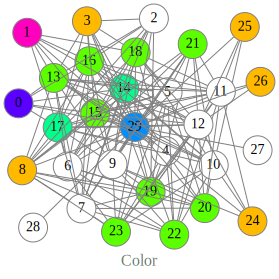

In [ ]:
display(Mat,directed=False,title="Color",dispo="neato",color = C)